In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib_venn as venn

from scripts import utils

In [2]:
cfg = utils.load_config()

## Read and store data

In [3]:
# Get sample names and paths to files:
samples = utils.samples_to_load("data")
samples

{'blank': 'data\\blank.csv',
 'sample_1': 'data\\sample_1.csv',
 'sample_2': 'data\\sample_2.csv'}

In [4]:
# Load data as list of MSData objects:
all_data = utils.load_data(samples)
all_data

[blank - (84401, 2), sample_1 - (78239, 2), sample_2 - (78634, 2)]

## Filter data and detect peaks

In [5]:
# Get the q-th percentile of the peak intensity in the blank:
percentile_cutoff = 80   # %

blank = all_data[0].get_rawdata_without_null()
blank_sorted = blank.sort_values(by="Intensity")
perc_height = np.percentile(blank_sorted["Intensity"], percentile_cutoff)

print(f"{percentile_cutoff}% percentile of m/z intensity in the blank: {perc_height :.3}")

80% percentile of m/z intensity in the blank: 2.96e+03


In [6]:
# Identify peaks above the cutoff threshold:
params_peak_detection = {"threshold": 0,
                         "height": perc_height} 

for m in all_data:
    m.get_peaks(**params_peak_detection)
    print(f"Condition: {m.condition}")
    print(f"Parameters used in peak filtering: {m.peak_params}")
    print(f"No. peaks found: {len(m.peak)}")
    print("************")

Condition: blank
Parameters used in peak filtering: {'threshold': 0, 'height': 2964.974774113468}
No. peaks found: 1428
************
Condition: sample_1
Parameters used in peak filtering: {'threshold': 0, 'height': 2964.974774113468}
No. peaks found: 1363
************
Condition: sample_2
Parameters used in peak filtering: {'threshold': 0, 'height': 2964.974774113468}
No. peaks found: 1785
************


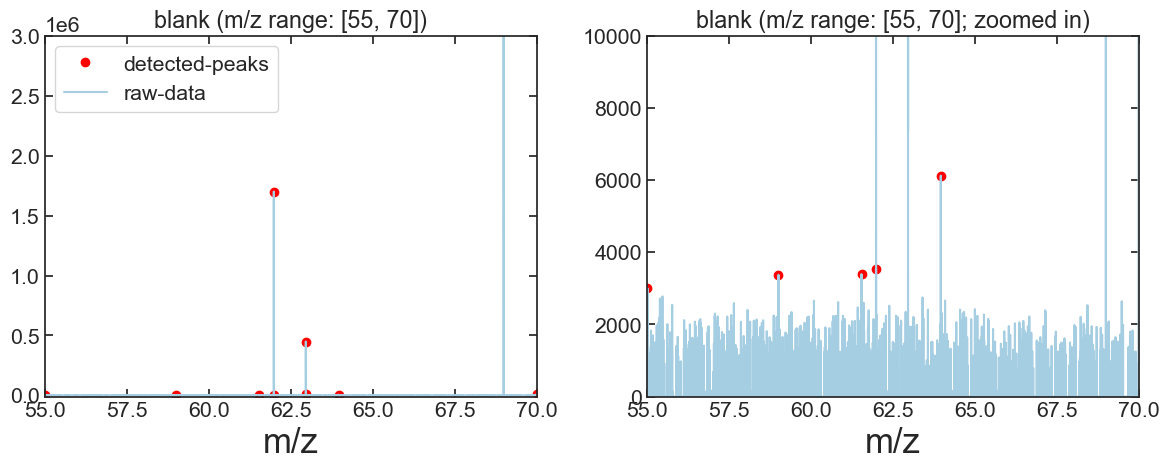

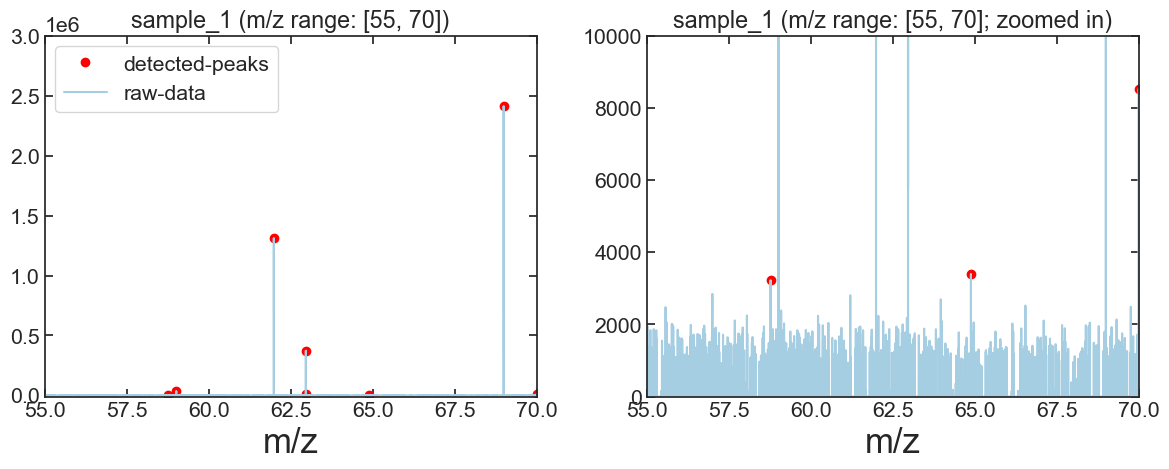

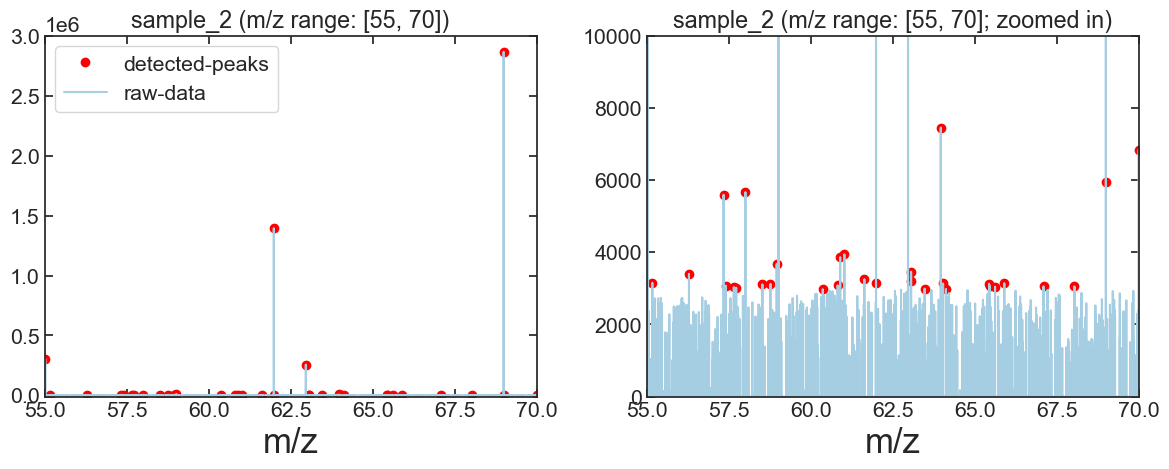

In [7]:
vis_window = [55, 70]

for m in all_data:
    f, ax = plt.subplots(1, 2, figsize=(12, 5))

    for ax_ in ax:
        m.plot_data(ax=ax_)
        ax_.set_xlim(vis_window)
        
    ax[0].set_ylim([-1e4, 0.3e7])
    ax[0].set_title(f"{m.condition} (m/z range: {vis_window})")
    
    ax[1].set_ylim([0, 1e4])
    ax[1].set_title(f"{m.condition} (m/z range: {vis_window}; zoomed in)")
    ax[1].legend([], [], frameon=False)

    plt.tight_layout()
    plt.savefig(f"plots/spectrum_{m.condition}.png")
    plt.show()

## Subtract blank

In [8]:
# Remove peaks with same m/z as found in the blank sample:
rpeaks1, df1 = utils.subtract_blank_peaks(all_data[1], all_data[0], rounding=3)
rpeaks2, df2 = utils.subtract_blank_peaks(all_data[2], all_data[0], rounding=3)

Input:
>> peaks in sample_1: 1363
>> peaks in blank (blank): 1428
Output:
>> 345 peaks in sample_1 not found in the blank
********
Input:
>> peaks in sample_2: 1785
>> peaks in blank (blank): 1428
Output:
>> 845 peaks in sample_2 not found in the blank
********


In [9]:
# Label dataframes:
df1["sample"] = "sample1"
df2["sample"] = "sample2"

# Concatenate all data:
df_all_peaks = pd.concat([df1, df2])
df_all_peaks["Mass"] = df_all_peaks["Mass"].round(3)

df_all_peaks.head()

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_4080\4144035886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["sample"] = "sample1"
C:\Users\Utilizador\AppData\Local\Temp\ipykernel_4080\4144035886.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["sample"] = "sample2"


,Mass,Intensity,sample
2617,58.773,3224.901791,sample1
6173,64.882,3397.901124,sample1
10448,73.192,2996.590167,sample1
13447,78.968,4910.482080,sample1
14893,82.990,4906.485501,sample1


## Commonalities between the samples

In [10]:
# All peaks in each sample:
peaks1 = set(df1["Mass"].round(3))
peaks2 = set(df2["Mass"].round(3))

# Intersection of two sets: peaks1 & peaks2
common_peaks = peaks1.intersection(peaks2)

print("Peaks common to both samples (and not found on the blank):")
print(f">> no. peaks: {len(common_peaks)}")
print(f">> m/z values: {common_peaks}")


Peaks common to both samples (and not found on the blank):
>> no. peaks: 92
>> m/z values: {82.99, 96.91, 96.936, 96.937, 96.945, 96.963, 96.967, 96.971, 97.011, 100.004, 112.017, 112.023, 113.036, 114.02, 130.051, 132.03, 133.014, 134.054, 135.055, 141.031, 142.946, 146.046, 147.03, 148.07, 155.01, 157.014, 157.025, 158.029, 171.006, 172.937, 174.041, 174.829, 175.036, 175.061, 180.99, 185.046, 185.118, 188.057, 197.902, 201.038, 212.969, 213.985, 214.984, 215.054, 220.147, 222.997, 231.027, 232.897, 238.871, 245.043, 248.918, 252.987, 253.01, 253.0, 267.015, 267.025, 270.9, 274.959, 274.969, 276.975, 278.894, 280.942, 282.871, 286.883, 294.902, 294.995, 300.912, 307.892, 314.883, 316.853, 316.881, 318.832, 320.827, 323.917, 326.853, 332.87, 353.2, 354.907, 353.907, 356.814, 356.927, 359.849, 372.848, 374.806, 374.876, 380.823, 384.851, 384.874, 386.818, 388.874, 390.797, 396.825}


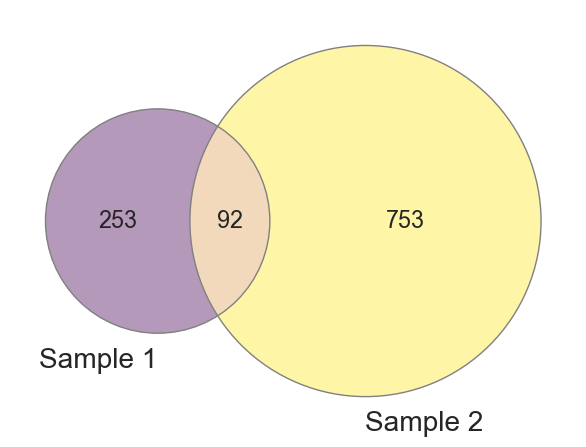

In [11]:
# Visualize intersection as a Venn diagram:
all_peaks = [peaks1, peaks2]

venn.venn2(all_peaks,
           set_labels=("Sample 1", "Sample 2"),
           set_colors=["#440154ff", "#fde725ff"],)

venn.venn2_circles(all_peaks,
                   linewidth=1,
                   color="grey")

plt.tight_layout()
plt.savefig("plots/venn_common-compounds.png")
plt.show()